# Mutually Unbiased Basis

## Introduction

What is Mutually Unbiased Basis (MUB)?

Wikipedia: https://en.wikipedia.org/wiki/Mutually_unbiased_bases

### How to Construct MUB?

cite this paper: https://link-springer-com.utokyo.idm.oclc.org/chapter/10.1007/978-3-540-24633-6_10#:~:text=Two%20orthonormal%20bases%20B%20and,d%20cannot%20exceed%20d%20%2B%201.

Section 3

In [27]:
import math
import cmath
from functools import reduce

# Failed... Maybe using 1j is not good?

T2 = [0, 1, 3j + 3, 1j]


def tr(a, b):
    # n=2
    return a + 2 * b + a**2 + 2 * (b**2)


def v_ab(n, a, b):
    return 2 ** (-n / 2) * sum(
        cmath.exp(2 * math.pi * 1j / 4 * tr(a, b) * x) for x in T2
    )


n = 2
for t in T2:
    print(f"t = {t}")
    for b in T2:
        ret = v_ab(n, t, b)
        real = ret.real
        imag = ret.imag
        if abs(real) < 1e-8:
            real = 0
        if abs(imag) < 1e-8:
            imag = 0
        if abs(real - 1 / 2) < 0.01:
            real = 1 / 2
        if abs(imag - 1 / 2) < 0.01:
            imag = 1 / 2
        print(real + 1j * imag)

t = 0
(2+0j)
(1.00093372462206+0j)
(0.5+0j)
(-10.591953275521519+0j)
t = 1
(0.021566609373100978+0j)
(4.0349758522378056e-05+0j)
(0.5+0j)
(0.021566609373100953+0j)
t = (3+3j)
(0.5-0.0044916455105670754j)
(0.5-8.387890764473475e-06j)
(0.5+3.624736257993971e-07j)
(0.5+0.10393978817538106j)
t = 1j
-2.5091784786580567j
(0.5-0.10843143368594568j)
(0.5+0.00019410160196338318j)
55.66338089043867j


(Anyway, We can construct MUB.)

## Proposition

MUBs can generate M_n

### How to Construct

(You can gave this code to ChatGPT to obtain pseudocode)

```python
for base in MUB:
    for state in base:
        psi = np.array(state, dtype=complex)
        rho = np.outer(psi, psi.conj())
        state_in_Pauli = state_in_pauli_basis(rho)
        yield state_in_Pauli
```

### Proof

By the paper you read?


## (Numerical Example)

MUB1:


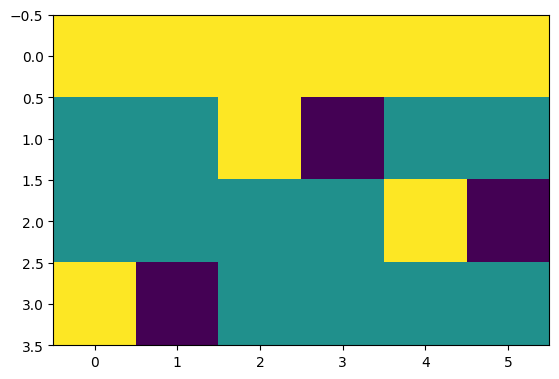

MUB2:


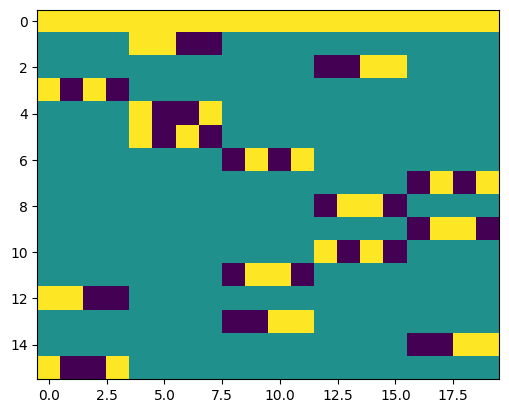

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from exputils.state.state_in_pauli_basis import state_in_pauli_basis

sq2 = 2**0.5
MUB1 = [
    [[1, 0], [0, 1]],
    [[1 / sq2, 1 / sq2], [1 / sq2, -1 / sq2]],
    [[1 / sq2, 1j / sq2], [1 / sq2, -1j / sq2]],
]
MUB2 = [
    [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]],
    [
        [1 / 2, 1 / 2, 1 / 2, 1 / 2],
        [1 / 2, 1 / 2, -1 / 2, -1 / 2],
        [1 / 2, -1 / 2, -1 / 2, 1 / 2],
        [1 / 2, -1 / 2, 1 / 2, -1 / 2],
    ],
    [
        [1 / 2, -1 / 2, -1j / 2, -1j / 2],
        [1 / 2, -1 / 2, 1j / 2, 1j / 2],
        [1 / 2, 1 / 2, 1j / 2, -1j / 2],
        [1 / 2, 1 / 2, -1j / 2, 1j / 2],
    ],
    [
        [1 / 2, -1j / 2, -1j / 2, -1 / 2],
        [1 / 2, -1j / 2, 1j / 2, 1 / 2],
        [1 / 2, 1j / 2, 1j / 2, -1 / 2],
        [1 / 2, 1j / 2, -1j / 2, 1 / 2],
    ],
    [
        [1 / 2, -1j / 2, -1 / 2, -1j / 2],
        [1 / 2, -1j / 2, 1 / 2, 1j / 2],
        [1 / 2, 1j / 2, -1 / 2, 1j / 2],
        [1 / 2, 1j / 2, 1 / 2, -1j / 2],
    ],
]

for n, MUB in enumerate([MUB1, MUB2], start=1):
    print(f"MUB{n}:")
    states = []
    for base in MUB:
        for state in base:
            psi = np.array(state, dtype=complex)
            assert np.isclose(np.linalg.norm(psi) ** 2, 1)
            rho = np.outer(psi, psi.conj())
            state_in_Pauli = state_in_pauli_basis(rho)
            states.append(state_in_Pauli)
    states = np.array(states)
    plt.imshow(states.T)
    plt.show()